First of all we import all libraries that are going to be used in this preprocessing study.

In [65]:
import numpy as np
# For plotting 2-D projections
from sklearn.manifold import TSNE
# For plotting
import matplotlib.pyplot as plt
# For balancing the classes 
from imblearn.over_sampling import SMOTE
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# To divide train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [66]:
np.random.seed(123456789)

In [67]:
data = []
file = open("./dataset/seismic-bumps.arff", "r")
read=False
for line in file:
    if read:
        data.append(line.strip().split(","))
    if "@data" in line and not read:
        read=True
data

[['a',
  'a',
  'N',
  '15180',
  '48',
  '-72',
  '-72',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'N',
  '14720',
  '33',
  '-70',
  '-79',
  'a',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '2000',
  '2000',
  '0'],
 ['a',
  'a',
  'N',
  '8050',
  '30',
  '-81',
  '-78',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'N',
  '28820',
  '171',
  '-23',
  '40',
  'a',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '3000',
  '3000',
  '0'],
 ['a',
  'a',
  'N',
  '12640',
  '57',
  '-63',
  '-52',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'W',
  '63760',
  '195',
  '-73',
  '-65',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'W',
  '207930',
  '614',
  '-6',
  '18',
  'a',
  '2',
  '2',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1000',

Now we have the dataset as string format. Still a couple of things to do, first of all we can see in the dataset description that there are no missing values to process. Then the next thing to think about is how could we change the string values that are not a number to numbers so they can be interpreted by the algorithms.

If we check the dataset we can see that the features 1,2,3 and 8 are categorical and the last feature is the class itself that means that there is a seismic bump aka earthquake in the next danger period coming. So for those features that are not the class we know that takes the following values:

| Feature | Range of values |
| ------- | --------------- |
|    1    |    {a,b,c,d}    |
|    2    |    {a,b,c,d}    |
|    3    |      {W,N}      |
|    8    |    {a,b,c,d}    |
|  class  |      {1,0}      |

Nice, lets do this, for out purposes $W=0$, $N=1$ and $\{a,b,c,d\} = \{1,2,3,4\}$

In [68]:
numerical_values = {"W": 0, "N": 1, "a": 1, "b": 2, "c": 3, "d": 4}
for row in data:
    row[0] = numerical_values[row[0]]
    row[1] = numerical_values[row[1]]
    row[2] = numerical_values[row[2]]
    row[7] = numerical_values[row[7]]
data

[[1,
  1,
  1,
  '15180',
  '48',
  '-72',
  '-72',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  1,
  '14720',
  '33',
  '-70',
  '-79',
  1,
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '2000',
  '2000',
  '0'],
 [1,
  1,
  1,
  '8050',
  '30',
  '-81',
  '-78',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  1,
  '28820',
  '171',
  '-23',
  '40',
  1,
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '3000',
  '3000',
  '0'],
 [1,
  1,
  1,
  '12640',
  '57',
  '-63',
  '-52',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  0,
  '63760',
  '195',
  '-73',
  '-65',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  0,
  '207930',
  '614',
  '-6',
  '18',
  1,
  '2',
  '2',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1000',
  '700',
  '0'],
 [1,
  1,
  1,
  '48990',
  '194',
  '

Now we are going to pass all values to float and take as well the labels apart.

In [69]:
for i in range(len(data)):
    new_row = []
    for j in range(len(data[0])):
        new_row.append(float(data[i][j]))
    data[i] = new_row
data = np.array(data)
labels = data[:,-1]

Now we are going to split the dataset in train and test so we can work only with the test dataset and finally obtain the score with the test.

In [70]:
data_train, data_test, labels_train, labels_test = train_test_split(data,labels,test_size=0.3, train_size=0.7, random_state=123456789, stratify=labels)

As a first approach to visualizing the dataset we are going to apply TSNE reduction to two components so we can see a projection of the data in $\mathbb{R}^2$

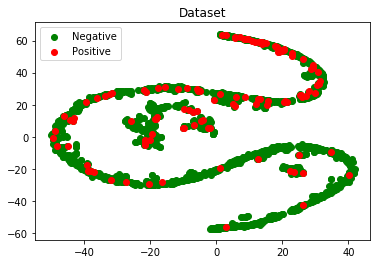

In [71]:
dataset_reduced = TSNE(n_components=2).fit_transform(data_train)
neg = np.array([dataset_reduced[i] for i in range(len(dataset_reduced)) if labels_train[i]==0])
pos = np.array([dataset_reduced[i] for i in range(len(dataset_reduced)) if labels_train[i]==1])
plt.scatter(neg[:,0], neg[:,1], c="green", label="Negative")
plt.scatter(pos[:,0], pos[:,1], c="red", label="Positive")
plt.legend()
plt.title("Dataset")
plt.show()

Another problem to issue is the fact that the classes are imbalanced. Lets check this out.

In [72]:
neg = 0
pos = 0
for l in labels_train:
    if l==0:
        neg+=1
    else:
        pos+=1
print("There is a " + str(100*pos/(neg+pos)) + "% of positive elements and a " + str(100*neg/(neg+pos)) + "% of negative ones.")

There is a 6.581858407079646% of positive elements and a 93.41814159292035% of negative ones.


As we can see the classes are clearly imbalanced showing a 6.5% only of positive cases. We need to balance this out as the smaller class is as well the most important one in prediction. The best thing is to predict real seismic bumps, the worst is failing at a prediction of a true positive. This is the same case as in medical situations. We would prefer failing and giving sometimes false positives rather than failing at predicting a true positive. 

In [73]:
sm = SMOTE(sampling_strategy=1,random_state = 123456789)
data_train_bal, labels_train_bal = sm.fit_resample(data_train,labels_train)

Now we have the dataset with clases balanced, lets count up the instances and plot the dataset again.

In [74]:
neg = 0
pos = 0
for l in labels_train_bal:
    if l==0:
        neg+=1
    else:
        pos+=1
print("There is a " + str(100*pos/(neg+pos)) + "% of positive elements and a " + str(100*neg/(neg+pos)) + "% of negative ones.")

There is a 50.0% of positive elements and a 50.0% of negative ones.


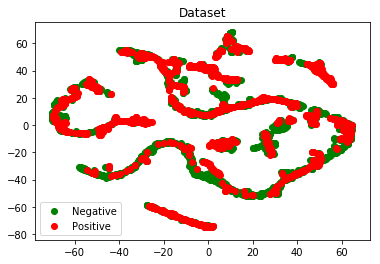

In [75]:
dataset_reduced = TSNE(n_components=2).fit_transform(data_train_bal)
neg = np.array([dataset_reduced[i] for i in range(len(dataset_reduced)) if labels_train_bal[i]==0])
pos = np.array([dataset_reduced[i] for i in range(len(dataset_reduced)) if labels_train_bal[i]==1])
plt.scatter(neg[:,0], neg[:,1], c="green", label="Negative")
plt.scatter(pos[:,0], pos[:,1], c="red", label="Positive")
plt.legend()
plt.title("Dataset")
plt.show()

Now we have a treatable dataset balanced, numerical and clean. At a first glance now we could think about normalizing it up or scaling or add new feature values to it. Before doing so we are going to check this possibility with a random forest model for testing and seeing how well we are actually doing by now.

In [76]:
rfor = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state=123456789)
rfor.fit(data_train_bal, labels_train_bal)
rfor.score(data_test, labels_test)

1.0

In [79]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True labels',
           xlabel='Predicted labels')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
pred = rfor.predict(data_test)
names = ["neg","pos"]
plot_confusion_matrix(labels_test, pred, classes=names,normalize = False)
plt.show()

So, as seen, Random Forest goes for a 100% score in both classes, we can now go and check how the rest of the models work with this processed chunk of data. To continue the experiment you should run the script preprocessing.py so the processed data is obtained and written for it to be used by the algorithms.